In [2]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats

In [3]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [4]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [5]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [6]:
# response['data']

# Fetching the data from API

In [7]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [8]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [9]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
13998,YT,2022-11-06,5578,5
13999,YT,2022-11-07,5581,3
14000,YT,2022-11-08,5582,1
14001,YT,2022-11-09,5582,0


In [10]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [11]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13900,YT,2022-11-01,32,0
13901,YT,2022-11-02,32,0
13902,YT,2022-11-03,32,0
13903,YT,2022-11-04,32,0


In [12]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [13]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13781,YT,2022-11-13,0,0
13782,YT,2022-11-14,0,0
13783,YT,2022-11-15,0,0
13784,YT,2022-11-16,0,0


In [14]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [15]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13047,YT,2022-11-01,5556,3,32,0,0,0
13048,YT,2022-11-02,5560,4,32,0,0,0
13049,YT,2022-11-03,5564,4,32,0,0,0
13050,YT,2022-11-04,5566,2,32,0,0,0


In [16]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6914,NT,2021-10-26,1826,40,9,0,0,0,0.493,0.000
1343,BC,2020-10-22,12574,200,256,0,71,1,2.036,0.000
372,AB,2021-03-15,138979,349,1952,3,255,7,1.405,0.860
6951,NT,2021-12-02,2068,5,12,0,0,0,0.580,0.000
9185,PE,2020-07-07,32,0,0,0,0,0,0.000,NaN
7367,NU,2020-09-11,0,0,0,0,0,0,NaN,NaN
12163,YT,2020-05-31,14,0,0,0,0,0,0.000,NaN
5237,NL,2022-09-14,51448,26,236,2,3,0,0.459,7.692
7351,NU,2020-08-26,0,0,0,0,0,0,NaN,NaN
10789,QC,2022-04-21,1022265,2945,15070,31,2405,24,1.474,1.053


In [17]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [18]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [19]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [20]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

# Data Visualization 

In [21]:
# Descriptive Statistics 
covid_combined_final_sorted_filled.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
count,1.050900e+04,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000,10509.000000
mean,1.331901e+05,296.465220,1717.538015,2.952517,206.873061,4.393187,1.215960,1.167732
std,2.838531e+05,1033.460529,3615.847280,10.149695,424.507299,18.327238,1.516647,7.090009
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+02,0.000000,3.000000,0.000000,0.000000,0.000000,0.323000,0.000000
50%,5.899000e+03,5.000000,63.000000,0.000000,9.000000,0.000000,0.939000,0.000000
75%,1.268030e+05,178.000000,1571.000000,0.000000,236.000000,0.000000,1.413000,0.000000
max,1.605818e+06,19509.000000,18181.000000,153.000000,4190.000000,758.000000,11.679000,200.000000


In [22]:
covid_combined_final_sorted_filled.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate'],
      dtype='object')

In [23]:
sorted_by_province = covid_combined_final_sorted_filled.groupby('Province').agg({'Cumulative confirmed cases': 'mean', 'Cumulative death cases':'mean','Cumulative hospitalizations cases':'mean', 'Mortality rate':'mean'})
sorted_by_province=pd.DataFrame(sorted_by_province)
sorted_by_province.rename(columns={"Cumulative confirmed cases": "Average confirmed cases", "Cumulative death cases": "Average death cases", "Cumulative hospitalizations cases":"Average hospitalization", "Mortality rate":"Average mortality rate"})


,Average confirmed cases,Average death cases,Average hospitalization,Average mortality rate
Province,,,,
AB,347140.717445,2945.179361,607.452088,1.021742
BC,215359.761404,2402.575439,274.308772,1.715335
MB,83820.979215,1298.712471,219.792148,1.706073
NB,23581.348810,169.292857,23.255952,1.078249
NL,14645.132733,60.615298,4.762655,0.704659
NS,20769.339416,185.330900,20.075426,2.624300
NT,1937.467517,4.773782,0.205336,0.113352
NU,541.728643,2.153266,0.000000,0.309275
ON,707213.674460,8982.510791,905.093525,2.582246


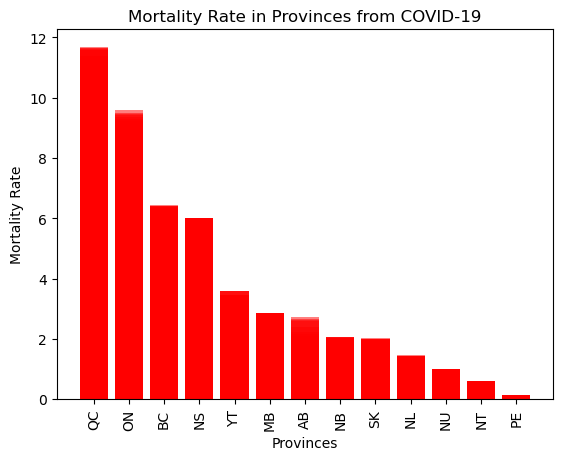

In [24]:
# Graph of mortality rate by province 

covid_combined_final_sorted_filled = covid_combined_final_sorted_filled.sort_values("Mortality rate",ascending = False)

x_value = covid_combined_final_sorted_filled["Province"]
y_value=covid_combined_final_sorted_filled["Mortality rate"]

plt.bar(x_value, y_value, color='red', alpha=0.5, align='center')
plt.xlabel("Provinces")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in Provinces from COVID-19")
plt.xticks(rotation="vertical")
plt.show()


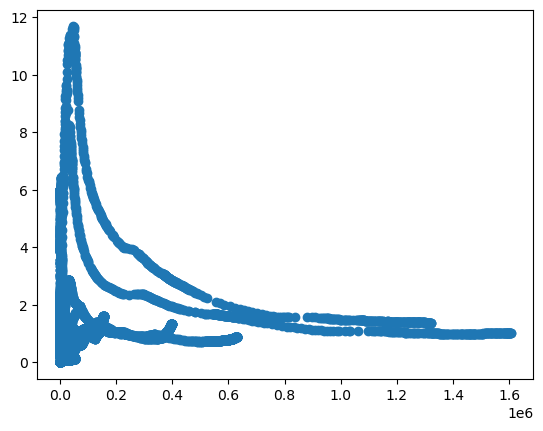

In [25]:
# Scatter plot 
x_value = covid_combined_final_sorted_filled["Cumulative confirmed cases"]
y_value=covid_combined_final_sorted_filled["Mortality rate"]
plt.scatter(x_value, y_value) 
plt.show()

In [29]:
x_value = sorted_by_province["Average confirmed cases"]
y_value = sorted_by_province["Average mortality rate"] 
plt.scatter(x_value,y_value)
plt.show()

TypeError: 'type' object is not subscriptable

In [27]:
x_value = covid_combined_final_sorted_filled["Cumulative confirmed cases"]
y_value=covid_combined_final_sorted_filled["Mortality rate"]

sorted_by_province = covid_combined_final_sorted_filled.groupby('Province').agg({'Cumulative confirmed cases': 'mean', 'Cumulative death cases':'mean','Cumulative hospitalizations cases':'mean', 'Mortality rate':'mean'})
sorted_by_province=pd.DataFrame

# corr = round(st.pearsonr(mouse_weight,mean_tum_vol)[0],2)
# print(f"The correlation between mouse weight and average tumor volume is {corr}")

# slope, int, r, p, std_err = stats.linregress(mouse_weight,mean_tum_vol) 
# y = slope * (mouse_weight) + int

# fig, ax = plt.subplots()
# ax.scatter(mouse_weight,mean_tum_vol)
# ax.plot(mouse_weight,y,"r--")

# # Set the axis labels and title
# ax.set_xlabel('Weight (g)')
# ax.set_ylabel('Average Tumor Volume (mm3)')
# ax.set_title('Average Tumor Volume vs. Mouse Weight for Capomulin')
# plt.show()